In [2]:
import pandas as pd
import os

# df = pd.read_csv(case)

# read all the files in the root folder
root_folder = '/data/prisoner_datasets/Flight Data'
# Get all the files in the root folder
files = os.listdir(root_folder)
csv_files = [file for file in files if file.endswith('.csv')]
filepath = os.path.join(root_folder, csv_files[2])

print(filepath)

df = pd.read_csv(filepath)

lon_mean = df['longitude'].mean()
lon_std = df['longitude'].std()
lon_min = lon_mean - 2 * lon_std
lon_max = lon_mean + 2 * lon_std

lat_mean = df['latitude'].mean()
lat_std = df['latitude'].std()
lat_min = lat_mean - 2 * lat_std
lat_max = lat_mean + 2 * lat_std

# print(df)

# get the first few rows of the data and turn to numpy array
# obs = df.to_numpy()
# obs = obs[:50]

selected_columns = df[['longitude', 'latitude', 'timestamp']]
obs = selected_columns.to_numpy()

# obs = obs[obs[:, 3] == 85]
print(obs)

# max_track = max(obs[:, 3])
# print(max_track)

# print(obs_two)

/data/prisoner_datasets/Flight Data/flight_track_data_N351LH_2019.csv
[[-74.09246826171875 40.68608093261719 '2019-01-01 14:03:52+00:00']
 [-74.09136962890625 40.68562316894531 '2019-01-01 14:03:53+00:00']
 [-74.09067327325994 40.68535239009534 '2019-01-01 14:03:54+00:00']
 ...
 [-74.11763971502131 40.73064771749205 '2019-12-29 21:27:41+00:00']
 [-74.11763971502131 40.73064771749205 '2019-12-29 21:27:42+00:00']
 [-74.11763971502131 40.73064771749205 '2019-12-29 21:27:43+00:00']]


In [3]:
print(lon_min, lon_max, lat_min, lat_max)

-74.17691977666769 -73.87076218208296 40.42036656772536 40.93868875939949


In [4]:
print("Total rows:", len(df))
print("Earliest date:", df['timestamp'].min())
print("Latest date:", df['timestamp'].max())


Total rows: 5001898
Earliest date: 2019-01-01 14:03:52+00:00
Latest date: 2019-12-29 21:27:43+00:00


(0.0, 34043.1552411497, 0.0, 75999.13485669438)

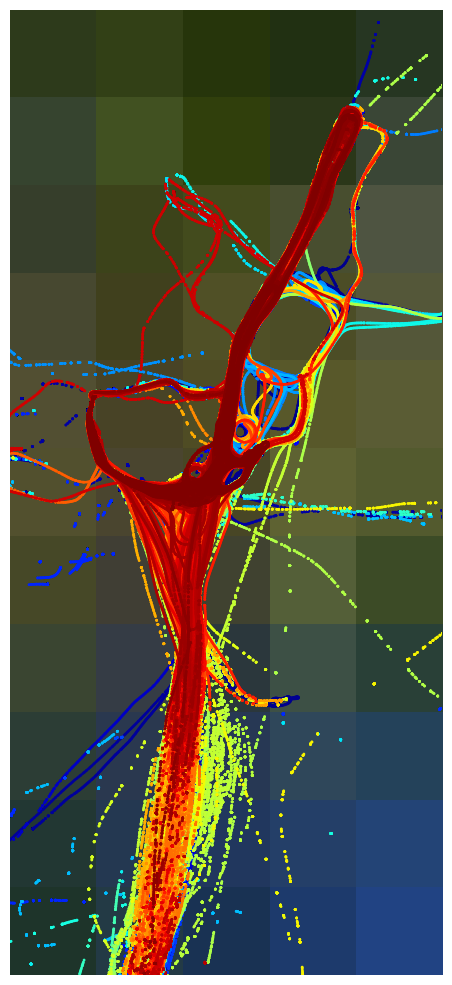

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np



plt.clf()
fig = plt.gcf()
fig.set_size_inches(10, 10)

path_length = len(obs)

show_type = 'flat'
if show_type == 'flat':
# create map using BASEMAP
    m = Basemap(
                llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                projection='merc',
                # projection='aeqd',
                resolution = None,
                area_thresh=10000.,
                )
else:
    width = 28000000
    m = Basemap(
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                projection='aeqd',
                width = width,
                height = width, 
                )
m.bluemarble()

size = 1
colors = plt.cm.jet(np.linspace(0,1,path_length))

# lon, lat
x, y = m(obs[:, 0], obs[:, 1])
# m.plot(x, y, marker='.', linestyle='', s=1, markersize=size, c='grey', label='Path')
m.scatter(x, y, s=size, c=colors, marker='o', label='Path')

#tight layout
plt.tight_layout()

plt.axis('off')